In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import glob
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [38]:
path = "C:\\app\\data\\weed-dataset\\dataset\\"

In [39]:
img_size = 200 # This is the final image size we want to crop

In [40]:
# Since iput images have varying size, we will
# crop the images from the center.

# We will also perform edge detection so that our simple network can get better data
def crop_and_process(img):
    img = cv2.resize(img,(img_size+20, img_size+20))
    x_crop = (int(img.shape[0]/2) - int(img_size/2), int(img.shape[0]/2) + int(img_size/2))
    y_crop = (int(img.shape[1]/2) - int(img_size/2), int(img.shape[1]/2) + int(img_size/2))
    img_crop =  img[x_crop[0]:x_crop[1], y_crop[0]:y_crop[1]]
    norm_image = cv2.normalize(img_crop, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return norm_image

In [41]:
broadleaf_images = [crop_and_process(cv2.imread(file)) for file in glob.glob(path + "broadleaf\\*.tif")]
grass_images = [crop_and_process(cv2.imread(file)) for file in glob.glob(path + "grass\\*.tif")]
soil_images = [crop_and_process(cv2.imread(file)) for file in glob.glob(path + "soil\\*.tif")]
soybean_images = [crop_and_process(cv2.imread(file)) for file in glob.glob(path + "soybean\\*.tif")]

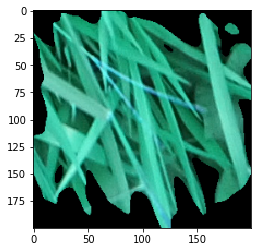

In [42]:
plt.imshow(grass_images[0])

In [43]:
y = np.array([0] * len(broadleaf_images) + [1] * len(grass_images) + [2] * len(soil_images) + [3] * len(soybean_images))

In [44]:
X = broadleaf_images + grass_images + soil_images + soybean_images

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = np.stack(X_train, axis = 0)
y_train = tf.keras.utils.to_categorical(y_train)
X_test = np.stack(X_test, axis = 0)
y_test = tf.keras.utils.to_categorical(y_test)

In [46]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(200,200,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 200, 200, 64)      1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 32)      18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 20000)            

In [47]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model.fit(X_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(X_test, y_test))

Train on 11502 samples, validate on 3834 samples
Epoch 1/10
11502/11502 [==============================] - 20s 2ms/sample - loss: 0.5030 - acc: 0.8007 - val_loss: 0.3306 - val_acc: 0.8839
Epoch 2/10
11502/11502 [==============================] - 18s 2ms/sample - loss: 0.2762 - acc: 0.8965 - val_loss: 0.2533 - val_acc: 0.9025
Epoch 3/10
11502/11502 [==============================] - 19s 2ms/sample - loss: 0.1935 - acc: 0.9266 - val_loss: 0.2397 - val_acc: 0.9116
Epoch 4/10
11502/11502 [==============================] - 19s 2ms/sample - loss: 0.1543 - acc: 0.9427 - val_loss: 0.1763 - val_acc: 0.9358
Epoch 5/10
11502/11502 [==============================] - 19s 2ms/sample - loss: 0.1024 - acc: 0.9628 - val_loss: 0.2158 - val_acc: 0.9272
Epoch 6/10
11502/11502 [==============================] - 18s 2ms/sample - loss: 0.0723 - acc: 0.9753 - val_loss: 0.1810 - val_acc: 0.9387
Epoch 7/10
 2688/11502 [======>.......................] - ETA: 12s - loss: 0.0340 - acc: 0.9903